
Clase 12: Optimización
============

Fecha: 28/05/2020

Ojetivos:

* Introducción a librerías de optimización de Python
* Applicaciones en problemas de Ingeniería en Biotecnología


Resolución Tarea Optativa: El problema del salvavidas
---------

Un salvavidas ubicado en el punto $A$ ve a un bañista con problemas en el punto $B$. El salvavidas save su desplasamiento es mucho más rápido en la arena que en el agua. Por lo tanto, para llegar lo más rapido posible al bañista es mejor no viajar en linea recta hacia el bañista sino que de manera indirecta para pasa alargar su trayecto por la arena. ¿Qué ruta debería seguir el salvavidas para demorarse lo menos posible en llegar al bañista? 

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase11_fig6.png" width="800">

Llamemos a la velocidad del salvavidas en la arena y agua como $v_s$ y $v_w$, respectivamente. También, que la distancia entre el salvavidas y el agua es $a$, que la distancia entre el bañista y la orilla es $b$, y que la distancia horizontal entre el salvavidas y el bañista es $c$. Llamaremos $x$ a la distancia horizontal en la cual el salvavidas entra al agua. Por otra parte, las distancias recorridas por el bañista en la arena y agua serán $d_s$ y $d_w$, respectivamente. 

Queremos el valor de $x$ que minimiza el tiempo total, $t$, el cual corresponde a:

$t=\frac{d_s}{v_s}+\frac{d_w}{v_s}$

Ejercicio
---------

1. Determina la ecuación $t$ en términos de $a,b,c,v_s,v_w$ y $x$. Pista, usa el teorema de Pitagoras para reemplazar $d_s$ y $d_w$ por expresiones que involucren los términos antes mencionados.
2. Considerando $a = 20$ m, $b = 50$ m, $c = 100$ m, $v_s = 6$ m/sec, y $v_w = 3$ m/sec, gráfica $t$ como función de $x$ en el dominio $x \in [0,100]$.
3. Gráfica la derivada de la función anterior. Consejo, puedes usar la librería ```symp``` para econtrar la derivada de una función. Abajo un ejemplo de como usar tal librería. 

In [9]:
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
x = sp.Symbol('x')
y = x**2 + 1
yprime = y.diff(x)
yprime


2*x

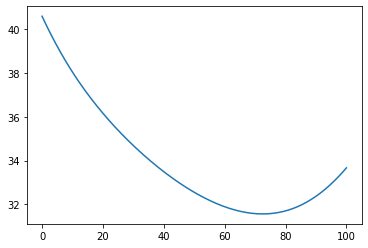

In [10]:
# 1. Grafica de t
x=np.linspace(0,100,200)
a=(20)
b=(50)
c=(100)
vs=6
vw=3
ds=np.power((np.power(x,2) + np.power(a,2)), 0.5)
dw=np.power((np.power(c-x,2)+np.power(b,2)), 0.5)
t=ds/vs + dw/vw
plt.plot(x,t)

In [11]:
# Derivada de t con respecto a x
import numpy as np
import sympy as sp
x=sp.Symbol('x')
a=(20)
b=(50)
c=(100)
vs=6
vw=3
ds=np.power((np.power(x,2) + np.power(a,2)), 0.5)
dw=np.power((np.power(c-x,2)+np.power(b,2)), 0.5)
t=ds/vs + dw/vw
tprime=t.diff(x)
tprime

0.166666666666667*x*(x**2 + 400)**(-0.5) + (1.0*x - 100.0)*((100 - x)**2 + 2500)**(-0.5)/3

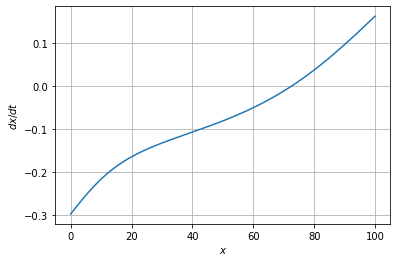

In [12]:
# 3. Grafica de dtdx
x=np.linspace(0,100,200)
dtdx=0.166666666*x/np.power(np.power(x,2)+400,0.5)+(x-100)/3/np.power(np.power(100-x,2)+2500,0.5)
plt.plot(x,dtdx)
plt.xlabel("$x$")
plt.ylabel('$dx/dt$')
plt.grid()

Herramientas de optimización en Python
------------

Resolvamos el problema del salvavidas con la librerias de Python

[72.49445759]


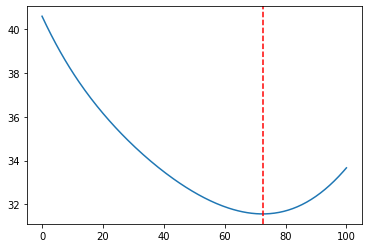

In [22]:
import numpy as np
from scipy.optimize import minimize

def salvavidas(x):
    a=(20)
    b=(50)
    c=(100)
    vs=6
    vw=3
    ds=np.power((np.power(x,2) + np.power(a,2)), 0.5)
    dw=np.power((np.power(c-x,2)+np.power(b,2)), 0.5)
    t=ds/vs + dw/vw
    return( t )

res = minimize(salvavidas,x0=30)

print( res.x )
x=np.linspace(0,100,200)
plt.plot(x,salvavidas(x))
plt.axvline(res.x,color="red",linestyle="--")

Aplicación: Curva de calibrado
-------------------

Para determinar una curva de calibrado se utiliza la siguiente relación lineal:

$A = a C + b$

En donde $A$, la absorvancia, y $C$, la concentración del soluto, son datos medidos experimentalmente. Por otro lado, $a$ $b$ son parametros a determinar.

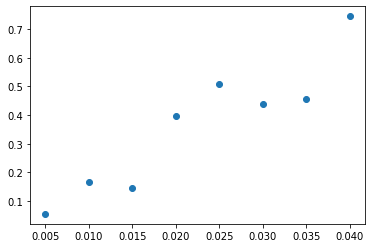

In [130]:
C=np.linspace(0.005,0.04,8)
A=np.linspace(0,0.7,8)
# Agregar ruido normal
A += np.random.normal(loc=0.0, scale=0.08, size=8)
plt.plot(C,A,"o")

In [131]:
def minCuadrados(params):
    a,b=params
    A_pred = a*conc+b
    erroresCuadrados = np.square(A-A_pred)
    sumErrores = np.sum(erroresCuadrados)
    return( sumErrores ) 

res = minimize(minCuadrados,x0=[1,0])
res.x

array([17.3368366 , -0.02567931])

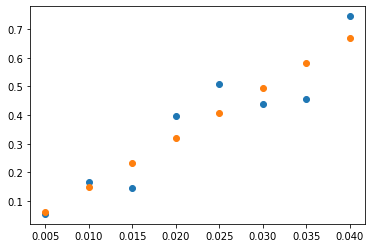

In [132]:
a,b=res.x
plt.plot(C,A,"o")
A_pred=a*C+b
plt.plot(C,A_pred,"o")

Minimo Global
------------

Hay varias herramientas para resolver estimar el máximo global, una de las más populares de ```basinhopping```. Veamos como utilizarla con el ejemplo de la clase pasada.

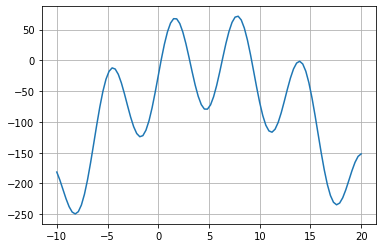

In [58]:
import numpy as np
from scipy.optimize import minimize

x=np.linspace(-10,20,100)
y=80*np.sin(x)-np.power(x-5,2)
plt.plot(x,y)
plt.grid()

In [59]:
def eggholder(x):
    return (-(80*np.sin(x)-np.power(x-5,2)))

x0=-15

from scipy import optimize
sol=optimize.basinhopping(eggholder,x0,stepsize=4)

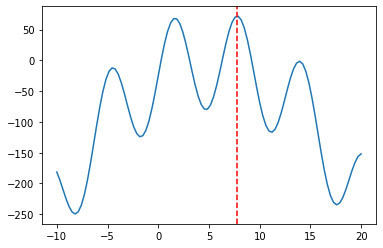

In [129]:
plt.plot(x,-eggholder(x))
plt.axvline(sol.x[0],linestyle="--",color="red")

Aplicación: Curva de títulación
-------------------

La siguiente es la ecuación de una curva de títulación potenciometrica de una solución con metales pesados cuando al medio se agrega espirulina (biomasa de alga). Esta curva depende de la concentración de acido en el medio (medido como pH). Para modelar la relación entre el potencial y concentración de acido se puede usar la ecuación propuesta por [Chojnacka et al](https://www.sciencedirect.com/science/article/pii/S0045653504009026?casa_token=ApCxvb4D1bEAAAAA:yJXgN3HxFbHE4NpQF0yzuQgdTNwyObIuXsFBhVpkbtWuCbg7ogjpd4yLm-rVIYac7fPAq97b9yk):

<img src="https://raw.githubusercontent.com/mrivas/ModelamientoDeProcesosBiotecnologicos/master/clase12_equation.png" width="500">

La cual depende de 6 parametros: $K_{a1},K_{a2},K_{a3},a,b$ y $c$

Ejercicio:

Si los valores de pH y Xadd son:

```python
pH=[1.00000000e-02, 1.56333333e+00, 3.11666667e+00, 4.67000000e+00,
       6.22333333e+00, 7.77666667e+00, 9.33000000e+00, 1.08833333e+01,
       1.24366667e+01, 1.39900000e+01]
Xadd=[1.36349767, 0.8879697 , 0.85343802, 0.85242845, 0.85237857,
       0.85160556, 0.82511459, 0.44761206, 0.19211348, 0.18024773]
```

Ejercicio
------------

1. Haz el gráifco de pH (eje x) vs Xadd (eje y)
2. Estima el valor de los parámetros $K_{a1},K_{a2},K_{a3},a,b$ y $c$